## Modeling

In [1]:
import yaml 
import numpy 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import numpy as np
from tensorflow.keras.preprocessing.image import DirectoryIterator, ImageDataGenerator
import os

In [3]:
def load_config():
    with open('D:\\ProgrammingD\\github\\abstract-painting\\src\\resources\\config.yml') as f:
        try:
            config = yaml.safe_load(f)
            print("Config Loaded Successfully")
            return config
        except Exception as e:
            print(e)
            return ""

In [4]:
config = load_config()

Config Loaded Successfully


In [5]:
def iterate_in_directory(directory=None, save_to_dir=None):
    
    if directory==None:
        print("loading directory from config...")
        print(config['RAW_IMG_DIR'])
        directory = config['RAW_IMG_DIR']
    if save_to_dir==None:
        print("preprocessed images will be saved to (per config)...")
        if config['PREPROCESSED_IMG_DIR']==None:
            print("Images will not be saved to a directory")
        else: print(config['PREPROCESSED_IMG_DIR'])
        save_to_dir = config['PREPROCESSED_IMG_DIR']
    
    idg = ImageDataGenerator(samplewise_center=True)

    """
    directory_iterator = DirectoryIterator(
        directory=directory,
        image_data_generator=idg,
        target_size=(config['IMAGE_PARAMS']['IMAGE_HEIGHT'],config['IMAGE_PARAMS']['IMAGE_WIDTH']),
        classes=None,
        seed=0,
        save_to_dir=save_to_dir
        )
    """
    # image generator to flow from directory
    idg = idg.flow_from_directory(
        directory=directory,
        target_size=(config['IMAGE_PARAMS']['IMAGE_HEIGHT'],config['IMAGE_PARAMS']['IMAGE_WIDTH']),
        batch_size=1
        )

    return idg

In [6]:
os.getcwd()

'd:\\ProgrammingD\\github\\abstract-painting\\notebooks\\model-example'

In [7]:
generator = iterate_in_directory(directory='D:\\ProgrammingD\\github\\abstract-painting\\data\\raw', save_to_dir=None)

preprocessed images will be saved to (per config)...
..\data\processed
Found 103 images belonging to 1 classes.


In [8]:
import glob
import matplotlib.pyplot as plt
import cv2
from sklearn.preprocessing import StandardScaler

In [9]:
img_dir = 'D:\\ProgrammingD\\github\\abstract-painting\\data\\raw\\img\\'
def preprocess_images(resize_height, resize_width, show=False):

    images = []
    counter = 0
    for f in glob.glob(f'{img_dir}*.jpg'):
        print(f"Image {counter}")
        img = cv2.imread(f)
        new_img = cv2.resize(img, (resize_height,resize_width))
        
        if show==True:
            plt.imshow(new_img)
            plt.show()

        #plt.imsave(f'./images_processed/train/{counter}.jpg', new_img)
        cv2.waitKey(0)

        #save as np array and add to array
        img_np = np.asarray(new_img) / 255.
        images.append(img_np)

        print(f"...complete")
        counter += 1
    images = np.array(images)
    return images

data = preprocess_images(480,720, show=False)

Image 0
...complete
Image 1
...complete
Image 2
...complete
Image 3
...complete
Image 4
...complete
Image 5
...complete
Image 6
...complete
Image 7
...complete
Image 8
...complete
Image 9
...complete
Image 10
...complete
Image 11
...complete
Image 12
...complete
Image 13
...complete
Image 14
...complete
Image 15
...complete
Image 16
...complete
Image 17
...complete
Image 18
...complete
Image 19
...complete
Image 20
...complete
Image 21
...complete
Image 22
...complete
Image 23
...complete
Image 24
...complete
Image 25
...complete
Image 26
...complete
Image 27
...complete
Image 28
...complete
Image 29
...complete
Image 30
...complete
Image 31
...complete
Image 32
...complete
Image 33
...complete
Image 34
...complete
Image 35
...complete
Image 36
...complete
Image 37
...complete
Image 38
...complete
Image 39
...complete
Image 40
...complete
Image 41
...complete
Image 42
...complete
Image 43
...complete
Image 44
...complete
Image 45
...complete
Image 46
...complete
Image 47
...complete
Im

In [10]:
data.shape

(103, 720, 480, 3)

In [11]:
data_32 = data.astype(np.float32)

In [12]:
encoder = keras.Sequential(
    [
        #layers.Conv2D(64, kernel_size=3, activation='relu'),
        #layers.MaxPool2D(),
        layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'),
        layers.MaxPool2D(),
        layers.Conv2D(24, kernel_size=3, activation='relu', padding='same'),
        layers.MaxPool2D()
    ]
)

decoder = keras.Sequential(
    [
        layers.Conv2DTranspose(5, kernel_size=3, strides = 2, activation='relu', padding='same'),
        layers.Conv2DTranspose(64, kernel_size=3, strides = 2, activation='relu', padding='same'),
        #layers.Conv2D(32, kernel_size=3, activation='relu'),
        #layers.UpSampling2D(),
        layers.Conv2D(10, kernel_size=3, activation='relu'),
        layers.Conv2D(3, kernel_size=3, activation='sigmoid')
    ]
)


model = keras.models.Sequential([
        #contract
        layers.Conv2D(64, kernel_size=3, activation='relu'),
        layers.MaxPool2D(),
        layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'),
        layers.MaxPool2D(),
        layers.Conv2D(24, kernel_size=3, activation='relu', padding='same'),
        layers.MaxPool2D(),
        # expand
        layers.Conv2DTranspose(24, kernel_size=3, strides=2, activation='relu', padding='same'),
        layers.Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same'),
        layers.Conv2DTranspose(64, kernel_size=3, strides=2, activation='relu', padding='same'),
        layers.Conv2D(3, kernel_size=3, activation='relu', padding='same')
        #layers.Conv2D(32, kernel_size=3, activation='relu'),
        #layers.UpSampling2D(),
        #layers.Conv2D(10, kernel_size=3, activation='relu'),
        #layers.Conv2D(3, kernel_size=3, activation='sigmoid')
])

In [13]:
loss = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
model.compile(optimizer='adam', loss=loss, metrics=['mse'])

In [14]:
#model.build(input_shape=[1,720,480,3])
#model.summary()
model.fit(x=data_32, y=data_32, epochs=10, batch_size=32)

Epoch 1/10


ValueError: in user code:

    C:\Users\Taylor Jensen\anaconda3\envs\abstract-painting\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\Users\Taylor Jensen\anaconda3\envs\abstract-painting\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Taylor Jensen\anaconda3\envs\abstract-painting\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Taylor Jensen\anaconda3\envs\abstract-painting\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Taylor Jensen\anaconda3\envs\abstract-painting\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Taylor Jensen\anaconda3\envs\abstract-painting\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\Users\Taylor Jensen\anaconda3\envs\abstract-painting\lib\site-packages\tensorflow\python\keras\engine\training.py:796 train_step
        loss = self.compiled_loss(
    C:\Users\Taylor Jensen\anaconda3\envs\abstract-painting\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\Taylor Jensen\anaconda3\envs\abstract-painting\lib\site-packages\tensorflow\python\keras\losses.py:155 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\Taylor Jensen\anaconda3\envs\abstract-painting\lib\site-packages\tensorflow\python\keras\losses.py:259 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\Taylor Jensen\anaconda3\envs\abstract-painting\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\Taylor Jensen\anaconda3\envs\abstract-painting\lib\site-packages\tensorflow\python\keras\losses.py:1215 mean_squared_error
        return backend.mean(math_ops.squared_difference(y_pred, y_true), axis=-1)
    C:\Users\Taylor Jensen\anaconda3\envs\abstract-painting\lib\site-packages\tensorflow\python\ops\gen_math_ops.py:10421 squared_difference
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    C:\Users\Taylor Jensen\anaconda3\envs\abstract-painting\lib\site-packages\tensorflow\python\framework\op_def_library.py:748 _apply_op_helper
        op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    C:\Users\Taylor Jensen\anaconda3\envs\abstract-painting\lib\site-packages\tensorflow\python\framework\func_graph.py:599 _create_op_internal
        return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    C:\Users\Taylor Jensen\anaconda3\envs\abstract-painting\lib\site-packages\tensorflow\python\framework\ops.py:3557 _create_op_internal
        ret = Operation(
    C:\Users\Taylor Jensen\anaconda3\envs\abstract-painting\lib\site-packages\tensorflow\python\framework\ops.py:2041 __init__
        self._c_op = _create_c_op(self._graph, node_def, inputs,
    C:\Users\Taylor Jensen\anaconda3\envs\abstract-painting\lib\site-packages\tensorflow\python\framework\ops.py:1883 _create_c_op
        raise ValueError(str(e))

    ValueError: Dimensions must be equal, but are 712 and 720 for '{{node mean_squared_error/SquaredDifference}} = SquaredDifference[T=DT_FLOAT](sequential_2/conv2d_7/Relu, IteratorGetNext:1)' with input shapes: [?,712,472,3], [?,720,480,3].


In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 718, 478, 64)      1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 359, 239, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 359, 239, 32)      18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 179, 119, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 179, 119, 24)      6936      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 89, 59, 24)        0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 178, 118, 24)     

In [134]:
result = model.predict(data_32)

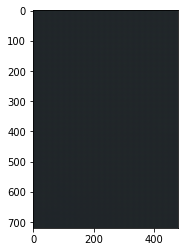

In [135]:
plt.imshow(result[5])

(720, 480, 3)